In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume,inbtou_volume_ov,inbtou_volume_sd,inbtou_spending,inbtou_spending_travel,inbtou_spending_transport,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,,,,,
2010,490000.0,388000.0,102000.0,630000000.0,450000000.0,180000000.0,0,0,0.000000,2010
2011,491000.0,431000.0,60000.0,650000000.0,472000000.0,178000000.0,0,0,0.000000,2011
2012,504000.0,455000.0,49000.0,852000000.0,413000000.0,439000000.0,0,0,0.000000,2012
2013,467000.0,434000.0,33000.0,856000000.0,430000000.0,426000000.0,0,0,0.000000,2013
2014,455000.0,412000.0,43000.0,875000000.0,447000000.0,428000000.0,0,0,0.000000,2014
2015,519000.0,440000.0,79000.0,809000000.0,531000000.0,278000000.0,0,0,0.000000,2015
2016,492000.0,409000.0,83000.0,708000000.0,464000000.0,244000000.0,0,0,0.000000,2016
2017,465000.0,395000.0,70000.0,717000000.0,453000000.0,264000000.0,0,0,0.000000,2017
2018,501000.0,375000.0,126000.0,541000000.0,429000000.0,112000000.0,0,0,0.000000,2018


Estimated COVID-19 effect: -342866 ± 25312 (95% confidence)


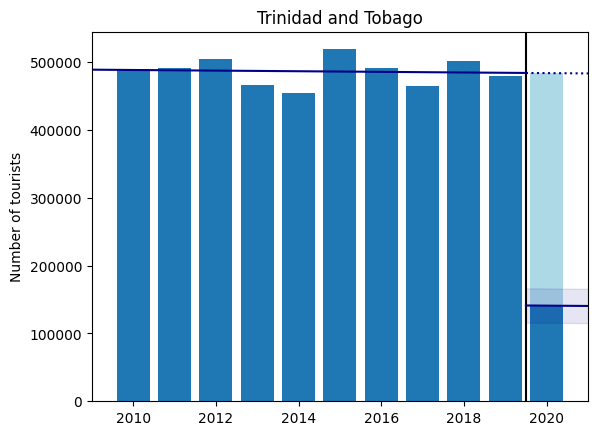

                            OLS Regression Results                            
Dep. Variable:      log_inbtou_volume   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     375.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           1.24e-08
Time:                        15:54:04   Log-Likelihood:                 20.734
No. Observations:                  11   AIC:                            -35.47
Df Residuals:                       8   BIC:                            -34.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.0363      9.555      1.574

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [3]:
# Set up plot
plt.title('Trinidad and Tobago')
plt.ylabel('Number of tourists')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -293466 ± 29130 (95% confidence)


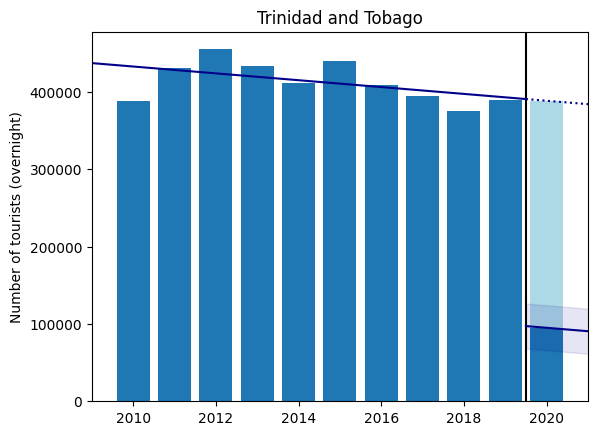

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_ov   R-squared:                       0.986
Model:                              OLS   Adj. R-squared:                  0.983
Method:                   Least Squares   F-statistic:                     291.3
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):           3.37e-08
Time:                          15:54:22   Log-Likelihood:                 17.445
No. Observations:                    11   AIC:                            -28.89
Df Residuals:                         8   BIC:                            -27.70
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        34.5439  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
# Set up plot
plt.title('Trinidad and Tobago')
plt.ylabel('Number of tourists (overnight)')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume_ov'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -49400 ± 33343 (95% confidence)


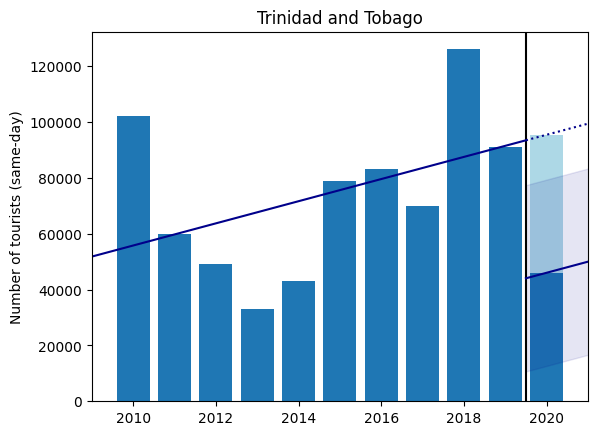

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_sd   R-squared:                       0.240
Model:                              OLS   Adj. R-squared:                  0.050
Method:                   Least Squares   F-statistic:                     1.266
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):              0.333
Time:                          15:54:36   Log-Likelihood:                -3.7979
No. Observations:                    11   AIC:                             13.60
Df Residuals:                         8   BIC:                             14.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -102.7187  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
# Set up plot
plt.title('Trinidad and Tobago')
plt.ylabel('Number of tourists (same-day)')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume_sd'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -483695180 ± 126502453 (95% confidence)


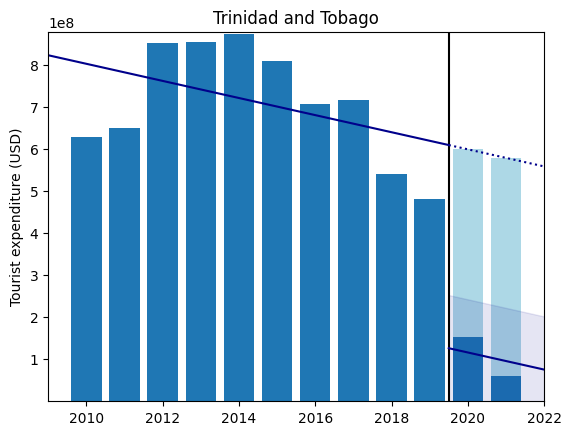

                             OLS Regression Results                            
Dep. Variable:     log_inbtou_spending   R-squared:                       0.961
Model:                             OLS   Adj. R-squared:                  0.946
Method:                  Least Squares   F-statistic:                     65.12
Date:                 Wed, 26 Apr 2023   Prob (F-statistic):           5.80e-06
Time:                         16:25:13   Log-Likelihood:                 5.2766
No. Observations:                   12   AIC:                            -2.553
Df Residuals:                        8   BIC:                           -0.6136
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
# Set up plot
plt.title('Trinidad and Tobago')
plt.ylabel('Tourist expenditure (USD)')
plt.xlim(2009, 2022)
plt.ylim(1, 8.8 * 10**8)
y_name = 'inbtou_spending'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -348301204 ± 39395327 (95% confidence)


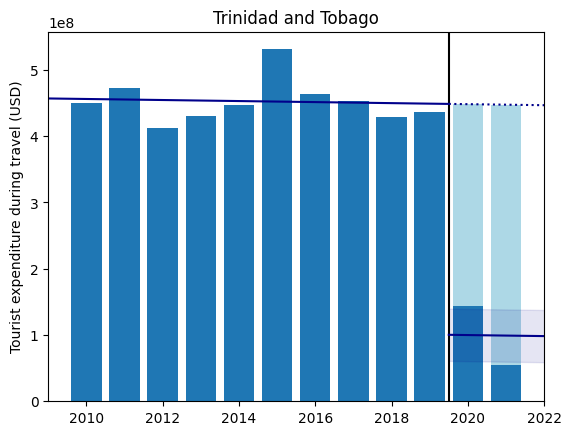

                                OLS Regression Results                                
Dep. Variable:     log_inbtou_spending_travel   R-squared:                       0.991
Model:                                    OLS   Adj. R-squared:                  0.988
Method:                         Least Squares   F-statistic:                     299.4
Date:                        Wed, 26 Apr 2023   Prob (F-statistic):           1.49e-08
Time:                                16:25:59   Log-Likelihood:                 16.723
No. Observations:                          12   AIC:                            -25.45
Df Residuals:                               8   BIC:                            -23.51
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
# Set up plot
plt.title('Trinidad and Tobago')
plt.ylabel('Tourist expenditure during travel (USD)')
plt.xlim(2009, 2022)
y_name = 'inbtou_spending_travel'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -135393975 ± 125824599 (95% confidence)


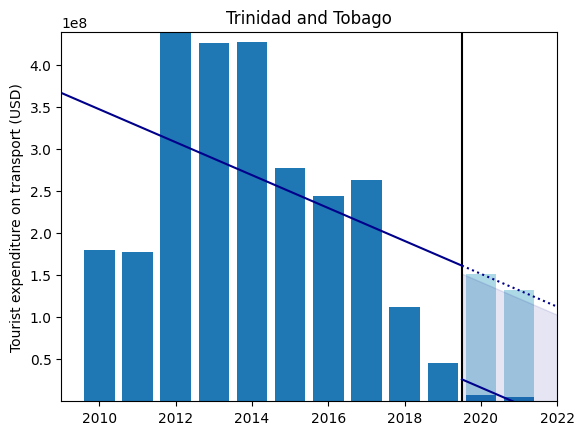

                                  OLS Regression Results                                 
Dep. Variable:     log_inbtou_spending_transport   R-squared:                       0.872
Model:                                       OLS   Adj. R-squared:                  0.824
Method:                            Least Squares   F-statistic:                     18.18
Date:                           Wed, 26 Apr 2023   Prob (F-statistic):           0.000624
Time:                                   16:26:30   Log-Likelihood:                -9.2012
No. Observations:                             12   AIC:                             26.40
Df Residuals:                                  8   BIC:                             28.34
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [13]:
# Set up plot
plt.title('Trinidad and Tobago')
plt.ylabel('Tourist expenditure on transport (USD)')
plt.xlim(2009, 2022)
plt.ylim(1, 4.4 * 10**8)
y_name = 'inbtou_spending_transport'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)